In [ ]:
# Importing required libraries which has layers, models and preprocessing image

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Adding a convolution Layer
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Prepare Training and Testing with ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory('C:/Users/mkakarla/Roofs/Training/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 392 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:


test_set = test_datagen.flow_from_directory('C:/Users/mkakarla/Roofs/Testing/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 14 images belonging to 2 classes.


In [ ]:
# Applying the generator with 25 epochs

# P.S ran only upto 13 because the accuracy is almost good. 

In [10]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 1426s 178ms/step - loss: 0.0505 - acc: 0.9802 - val_loss: 1.0648 - val_acc: 0.7857
Epoch 2/25
8000/8000 [==============================] - 1421s 178ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 1.6235 - val_acc: 0.7143
Epoch 3/25
8000/8000 [==============================] - 1423s 178ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 1.5727 - val_acc: 0.7857
Epoch 4/25
8000/8000 [==============================] - 1421s 178ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 1.9722 - val_acc: 0.7857
Epoch 5/25
8000/8000 [==============================] - 1422s 178ms/step - loss: 0.0020 - acc: 0.9995 - val_loss: 2.5851 - val_acc: 0.7143
Epoch 6/25
8000/8000 [==============================] - 1417s 177ms/step - loss: 4.8660e-04 - acc: 0.9999 - val_loss: 2.6956 - val_acc: 0.7857
Epoch 7/25
8000/8000 [==============================] - 1418s 177ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 2.5376 - val_acc: 0.7857
Epoch 8/25
8000/8000 [=

KeyboardInterrupt: 

In [17]:
from PIL import Image

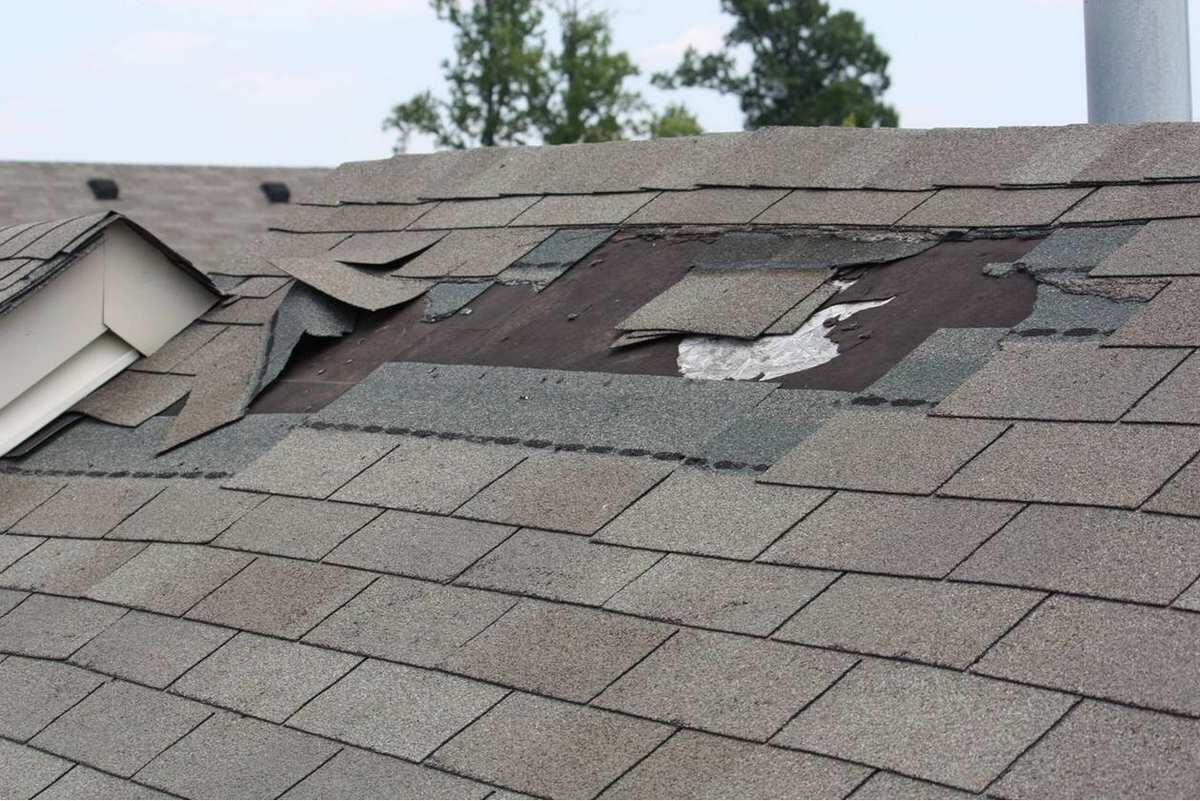

In [18]:
Image.open('C:/Users/mkakarla/validate.jpg')

In [12]:
import numpy as np
from keras.preprocessing import image
validate_image = image.load_img('C:/Users/mkakarla/validate.jpg', target_size = (64, 64))
validate_image = image.img_to_array(validate_image)
validate_image = np.expand_dims(validate_image, axis = 0)
result = classifier.predict(validate_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'good'
else:
    prediction = 'bad'

In [13]:
prediction

'bad'

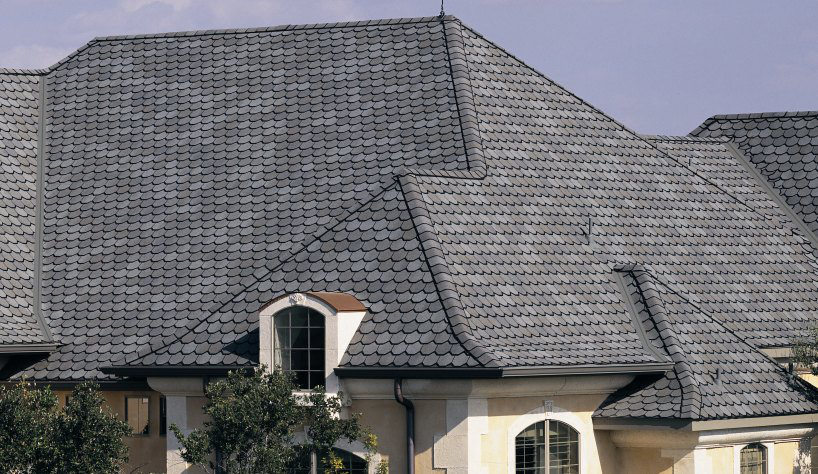

In [19]:
Image.open('C:/Users/mkakarla/good.jpg')

In [15]:
import numpy as np
from keras.preprocessing import image
validate_image = image.load_img('C:/Users/mkakarla/good.jpg', target_size = (64, 64))
validate_image = image.img_to_array(validate_image)
validate_image = np.expand_dims(validate_image, axis = 0)
result = classifier.predict(validate_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'good'
else:
    prediction = 'bad'
prediction

'good'